Dataset: https://archive.ics.uci.edu/ml/datasets/Lung+Cancer

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
names = ['random_txt'] * 57

In [94]:
lung_data = pd.read_csv('lung_data.csv', names = names)

c:\users\root\appdata\local\programs\python\python37-32\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [95]:
lung_data.head()

,random_txt,random_txt.1,random_txt.2,random_txt.3,random_txt.4,random_txt.5,random_txt.6,random_txt.7,random_txt.8,random_txt.9,...,random_txt.47,random_txt.48,random_txt.49,random_txt.50,random_txt.51,random_txt.52,random_txt.53,random_txt.54,random_txt.55,random_txt.56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [96]:
# ? in dataset in rows 0, 14, 18, 18, 20, 25
lung_data = lung_data.drop([0, 14, 18, 20, 25], axis=0)

lung_data.shape

(27, 57)

# Step 1. Preprocessing

###  Step 1.0 Features vs Labels(classes)

In [97]:
classes = lung_data.iloc[:, 0].values
features = lung_data.iloc[:, 1:].values

In [98]:
print(classes.shape)
print(features.shape)

(27,)
(27, 56)


### Step 1.1 Finding the best features

Because we have 56 different feautres, for each sample, we want to know what are those features which are the most relevant for our 
classification.

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

In [100]:
etc = ExtraTreesClassifier(n_estimators=10)

etc.fit(features, classes)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [101]:
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]

[0.         0.04937834 0.00557851 0.01171488 0.00780992 0.08120962
 0.00743802 0.07627113 0.00688017 0.01394628 0.01636364 0.03719008
 0.01345382 0.03562359 0.03673554 0.         0.         0.00458678
 0.02182113 0.09376413 0.01115702 0.00278926 0.0680344  0.00340909
 0.01329325 0.01208678 0.01896694 0.00743802 0.00371901 0.
 0.02017683 0.01283058 0.00278926 0.00061983 0.02860094 0.
 0.01676606 0.02018879 0.         0.01115702 0.00883264 0.00557851
 0.0203118  0.01979044 0.00753099 0.006142   0.00666322 0.00502066
 0.01898022 0.00334711 0.         0.0097624  0.06040779 0.02194317
 0.00573347 0.02616692]


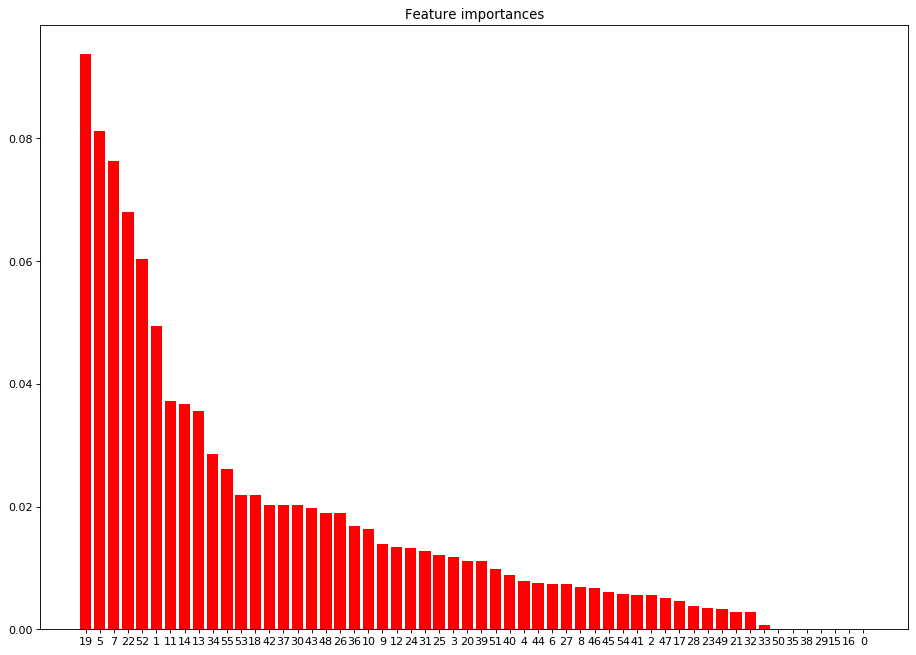

In [102]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(features.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

### Step 1.2 Scaling data

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.float64(features))

### Step 1.3 Train and test split

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, classes, test_size=0.2)

In [107]:
print("X_train shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_train shape --> (21, 56)
y_train shape --> (21,)
X_test shape --> (6, 56)
y_test shape --> (6,)


# Step 2 Predicting

### Step 2.1 K Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### 2.1.1 Test on the unscaled data

In [109]:
knn_sklearn = KNeighborsClassifier()
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [110]:
print("KNN algorithm on the unscalled data got: {}%".format(accuracy_score(y_test, knn_sklearn.predict(X_test))*100))

KNN algorithm on the unscalled data got: 50.0%


#### 2.1.2 Test on the scaled data

In [111]:
knn_sklearn_scaled = KNeighborsClassifier()
knn_sklearn_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
print("KNN algorithm on the scalled data got: {}%".format(accuracy_score(y_test_scaled, knn_sklearn_scaled.predict(X_test_scaled))*100))

KNN algorithm on the scalled data got: 50.0%


In [115]:
knn_sklearn_lower = KNeighborsClassifier(n_neighbors=10)
knn_sklearn_lower.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [116]:
print("KNN algorithm on the unscalled data, k=3, got: {}%".format(accuracy_score(y_test, knn_sklearn_lower.predict(X_test))*100))

KNN algorithm on the unscalled data, k=3, got: 50.0%


### Step 2.2 SVM

In [117]:
from sklearn.svm import SVC

In [118]:
#Default setting for SVC
svclasifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

In [119]:
svclasifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
print("Default SVC algorithm on the unscalled data, got: {}%".format(accuracy_score(y_test, svclasifier.predict(X_test))*100))

Default SVC algorithm on the unscalled data, got: 66.66666666666666%


# Confusion Matrix

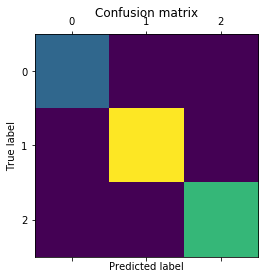

In [121]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
confusion_matrix = confusion_matrix(y_test, set_svm.predict(X_test))
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()